## SERID Epidemiological Model Based Simulation

The first step to begin the simulation is to determine the differential equations reggarding the model. The SEIRD model divides the population into 5 groups, those suseptible to the disease $S(t)$, those who got the disease, but didn't develop symptoms yet $E(t)$, the ones who are infected and already show symptoms $I(t)$, those who recovered from the disease $R(t)$ and acquried immunicity and at last, the ones who sadly died from the disease $D(t)$.

The behavior of these populations is governed by exchanging rates, that is, rates in which individuals leave a group and get to another group.

![models.png](models.png)

With that in hands, we build the equations for the $S$ population

$$\frac{dS}{dt} = -\beta  \frac{S(t)I(t)}{N}$$

the $E$ population

$$\frac{dE}{dt} = \beta  \frac{S(t)I(t)}{N} - \alpha E(t)$$

the $I$ population

$$\frac{dI}{dt} = \alpha E(t) - \gamma I(t) - \delta I(t)$$

the $R$ population

$$\frac{dR}{dt} = \gamma I(t)$$

and the $D$ population

$$\frac{dD}{dt} = \delta I(t)$$

### Importing Necessary Modules

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [5]:
### Making Cufflinks and Plotly In Offline Mode
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

### Checking For The Necessary Files

In [4]:
files_data = [files for files in os.listdir(r"./COVID-GLOBAL-Reports")]

for files in files_data :
    print(files)

time_series_covid19_confirmed_global.csv
time_series_covid19_recovered_global.csv
time_series_covid19_deaths_global.csv


### Reading The Dataset

#### a) Confirmed Data Sets

In [8]:
df = pd.read_csv(r"./COVID-GLOBAL-Reports/time_series_covid19_confirmed_global.csv")
df.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,948,949,964,969,981,989,998,1004,1029,1050
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,762,762,762,762,762,763,763,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,50,52,52,58,60,61,69,70,70,71


#### b) Recovered Data Sets

In [9]:
df2 = pd.read_csv(r"./COVID-GLOBAL-Reports/time_series_covid19_recovered_global.csv")
df2.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,801,850,930,938,996,1040,1075,1097,1128,1138
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,727,742,758,771,777,783,789,795,803,812
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,624,628,639,639,652,653,653,663,676,676
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,17,17,18,18,18,18,18


#### c) Dealths Data Sets

In [10]:
df3 = pd.read_csv(r"./COVID-GLOBAL-Reports/time_series_covid19_deaths_global.csv")
df3.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,173,178,187,193,205,216,218,219,220,227
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,32,32,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,555,561,568,575,582,592,600,609,617,623
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,3,4,4,4,4,4


### Filtering Out All Data Together As a List Type

In [11]:
recovered_case =df2[df2['Country/Region'] == 'Italy'].values[0:, 4:].tolist()
for recovered_case in recovered_case :
    print(recovered_case)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 3, 45, 46, 46, 83, 149, 160, 276, 414, 523, 589, 622, 724, 724, 1045, 1045, 1439, 1966, 2335, 2749, 2941, 4025, 4440, 4440, 6072, 7024, 7024, 8326, 9362, 10361, 10950, 12384, 13030, 14620, 15729, 16847, 18278, 19758, 20996, 21815, 22837, 24392, 26491, 28470, 30455, 32534, 34211, 35435, 37130, 38092, 40164, 42727, 44927, 47055, 48877, 51600, 54543, 57576, 60498, 63120, 64928, 66624, 68941, 71252, 75945, 78249, 79914, 81654, 82879, 85231, 93245, 96276, 99023, 103031, 105186, 106587, 109039, 112541, 115288, 120205, 122810, 125176, 127326, 129401, 132282, 134560, 136720, 138840, 140479, 141981, 144658, 147101]


In [12]:
confirmed_case = df[df['Country/Region'] == 'Italy'].values[0:, 4:].tolist()

for confirmed_case in confirmed_case:
    print(confirmed_case)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15113, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021, 53578, 59138, 63927, 69176, 74386, 80589, 86498, 92472, 97689, 101739, 105792, 110574, 115242, 119827, 124632, 128948, 132547, 135586, 139422, 143626, 147577, 152271, 156363, 159516, 162488, 165155, 168941, 172434, 175925, 178972, 181228, 183957, 187327, 189973, 192994, 195351, 197675, 199414, 201505, 203591, 205463, 207428, 209328, 210717, 211938, 213013, 214457, 215858, 217185, 218268, 219070, 219814, 221216, 222104, 223096, 223885, 224760, 225435, 225886, 226699, 227364, 228006, 228658, 229327, 229858, 230158, 230555, 231139]


In [13]:
deaths_case = df3[df3['Country/Region'] == 'Italy'].values[0:, 4:].tolist()

for deaths_case in deaths_case :
    print(deaths_case)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 7, 10, 12, 17, 21, 29, 34, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8215, 9134, 10023, 10779, 11591, 12428, 13155, 13915, 14681, 15362, 15887, 16523, 17127, 17669, 18279, 18849, 19468, 19899, 20465, 21067, 21645, 22170, 22745, 23227, 23660, 24114, 24648, 25085, 25549, 25969, 26384, 26644, 26977, 27359, 27682, 27967, 28236, 28710, 28884, 29079, 29315, 29684, 29958, 30201, 30395, 30560, 30739, 30911, 31106, 31368, 31610, 31763, 31908, 32007, 32169, 32330, 32486, 32616, 32735, 32785, 32877, 32955, 33072]


### Filtering Out The Dates From The Data

In [15]:
dates = df.iloc[0:, 4:].columns.tolist()
dates

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/13/20',
 '4/14/20',
 '4/15/20',
 '4/16/

### Combined Those Data To Make Our Working Data

In [16]:
all_data = {'Dates':dates, 'Confirmed': confirmed_case, 'Recovered':recovered_case, 'Deaths':deaths_case}
all_data

{'Dates': ['1/22/20',
  '1/23/20',
  '1/24/20',
  '1/25/20',
  '1/26/20',
  '1/27/20',
  '1/28/20',
  '1/29/20',
  '1/30/20',
  '1/31/20',
  '2/1/20',
  '2/2/20',
  '2/3/20',
  '2/4/20',
  '2/5/20',
  '2/6/20',
  '2/7/20',
  '2/8/20',
  '2/9/20',
  '2/10/20',
  '2/11/20',
  '2/12/20',
  '2/13/20',
  '2/14/20',
  '2/15/20',
  '2/16/20',
  '2/17/20',
  '2/18/20',
  '2/19/20',
  '2/20/20',
  '2/21/20',
  '2/22/20',
  '2/23/20',
  '2/24/20',
  '2/25/20',
  '2/26/20',
  '2/27/20',
  '2/28/20',
  '2/29/20',
  '3/1/20',
  '3/2/20',
  '3/3/20',
  '3/4/20',
  '3/5/20',
  '3/6/20',
  '3/7/20',
  '3/8/20',
  '3/9/20',
  '3/10/20',
  '3/11/20',
  '3/12/20',
  '3/13/20',
  '3/14/20',
  '3/15/20',
  '3/16/20',
  '3/17/20',
  '3/18/20',
  '3/19/20',
  '3/20/20',
  '3/21/20',
  '3/22/20',
  '3/23/20',
  '3/24/20',
  '3/25/20',
  '3/26/20',
  '3/27/20',
  '3/28/20',
  '3/29/20',
  '3/30/20',
  '3/31/20',
  '4/1/20',
  '4/2/20',
  '4/3/20',
  '4/4/20',
  '4/5/20',
  '4/6/20',
  '4/7/20',
  '4/8/20',
  '

In [17]:
new_data = pd.DataFrame(data = all_data, dtype ='int64')
new_data.head(40)

<ipython-input-17-81343935449a>:1: FutureWarning:

Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised



,Dates,Confirmed,Recovered,Deaths
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
5,1/27/20,0,0,0
6,1/28/20,0,0,0
7,1/29/20,0,0,0
8,1/30/20,0,0,0
9,1/31/20,2,0,0


### Checking The Case Increases With Coloring 

In [18]:
new_data.style.background_gradient(cmap='Reds', low = 1, axis = 0)

,Dates,Confirmed,Recovered,Deaths
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
5,1/27/20,0,0,0
6,1/28/20,0,0,0
7,1/29/20,0,0,0
8,1/30/20,0,0,0
9,1/31/20,2,0,0


### Checked For Null Cases

In [21]:
new_data.isnull().sum()

Dates        0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

### Defining Necessary Variables For Single Day Cases

In [ ]:
# Spliting the data for one day rolling window approach
confirmed_per_day = []
confirmed_rate_change = []
confirmed_growth_factor = []

### Check For Per Day Cases Been Confirmed

In [19]:
minimum = 0
maximum = len(new_data)
for i in range(minimum+1, maximum):
    j = i-1
    confirmed_per_day= new_data.iloc[0:, 1][j+1] - new_data.iloc[0:, 1][j]
    
    print(i, confirmed_per_day)


1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 2
10 0
11 0
12 0
13 0
14 0
15 0
16 1
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 17
31 42
32 93
33 74
34 93
35 131
36 202
37 233
38 240
39 566
40 342
41 466
42 587
43 769
44 778
45 1247
46 1492
47 1797
48 977
49 2313
50 2651
51 2547
52 3497
53 3590
54 3233
55 3526
56 4207
57 5322
58 5986
59 6557
60 5560
61 4789
62 5249
63 5210
64 6203
65 5909
66 5974
67 5217
68 4050
69 4053
70 4782
71 4668
72 4585
73 4805
74 4316
75 3599
76 3039
77 3836
78 4204
79 3951
80 4694
81 4092
82 3153
83 2972
84 2667
85 3786
86 3493
87 3491
88 3047
89 2256
90 2729
91 3370
92 2646
93 3021
94 2357
95 2324
96 1739
97 2091
98 2086
99 1872
100 1965
101 1900
102 1389
103 1221
104 1075
105 1444
106 1401
107 1327
108 1083
109 802
110 744
111 1402
112 888
113 992
114 789
115 875
116 675
117 451
118 813
119 665
120 642
121 652
122 669
123 531
124 300
125 397
126 584


In [ ]:
new_data.plot(kind= 'line')

### Now Define The SEIRD Model and Work On The Problem

In [23]:
N = 60466751 # Italis Population in 2019

In [24]:
available = len(new_data.iloc[9:,0])
print("Available", available ,"days")

Available 118 days


In [25]:
start_date = new_data.iloc[9:, 0] # getting the first date from Date Column
confirmed  = new_data.iloc[9:, 1].values.tolist() # getting the confirmed data values as a list type object
recovered  = new_data.iloc[9:, 2].values.tolist() # getting the recovered data values as a list type object
deaths     = new_data.iloc[9:, 3].values.tolist() # getting the deaths data values as a list type object

In [26]:
start_date = new_data['Dates'].iloc[9]
start_date

'1/31/20'

### Finding The Infected Ones

In [27]:
infected = [c - r - d for (c, r, d) in zip(confirmed, recovered, deaths)] # calculating infected
# logic behind is --> if subtract confirmed, recovered and deaths case then we will get the infected cases

### Ploting The Graph For Confirm, Recovered And Death Cases

In [28]:
import plotly.graph_objects as go

date = dates
x  = confirmed 
y0 = recovered 
y1 = deaths
y2 = infected

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x = dates, y = x,
                    mode='lines',
                    name='confirmed', ))
fig.add_trace(go.Scatter(x = dates, y = y0,
                    mode='lines',
                    name='recovered'))
fig.add_trace(go.Scatter(x = dates, y = y1,
                    mode='lines',
                    name='deaths'))
fig.add_trace(go.Scatter(x = dates, y = y2,
                    mode='lines',
                    name='infected'))
 
fig.update_xaxes(showspikes=True, title = 'Dates')
fig.update_yaxes(showspikes=True, title= 'Total Cases')
fig.update_layout(title='Italy Corona Cases Over Some Criteria', hovermode='x unified', )

fig.show()

### Generating N Days

In [29]:
#Helper Function

t_max = available + 7 # available = 118 + 7 = 125

date = np.array("2020-01-31", dtype=np.datetime64)  # creating datetime array which takes the first date of the dataframe
dates = date + np.arange(t_max)
str_dates = []
for i in dates:
    str_dates.append(str(i))

print(str_dates)
print("\n\nLength For This Data = ",len(str_dates))

['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020

In [61]:
# t = np.arange(t_max)
# t

### SEIRD Model Fucntion Defining

In [59]:
# DATE_0, S_0, E_0, I_0, R_0, D_0 = init_vals
# DATE, S, E, I, R, D = [DATE_0], [S_0], [E_0], [I_0], [R_0], [D_0]
# alpha, beta, gamma, delta = params
    
# ##### Create next t days ######
# date = np.array(DATE, dtype=np.datetime64)
# dates = date + np.arange(len(t))
# str_dates = []
# for i in dates:
#     str_dates.append(str(i))
#     print(i)
        

In [72]:
def seird_model(init_vals, params, t):
    
    ## initializing the initial values for all the data
    DATE_0, S_0, E_0, I_0, R_0, D_0 = init_vals
    ## assigning the initial values to the actual data variables
    DATE, S, E, I, R, D = [DATE_0], [S_0], [E_0], [I_0], [R_0], [D_0]
    # setting the ratio constant over a day
    alpha, beta, gamma, delta = params
    
    ##### Create next t days ######
    date = np.array(DATE, dtype=np.datetime64)
    dates = date + np.arange(len(t))
    str_dates = []
    for i in dates:
        str_dates.append(str(i))
        
    ##### End creating t days #####
    ##### Though we assumne that we have the initial day data ,, n now we want calculate the next n days data
    ##### so we are going start the calculation from the next 1th day to next nth days 
    for tic in t[1:]:
        
        ### also here, we need to specify the next 1th to next nth days in DATE list
        DATE.append(str_dates[tic])
        ### next data list varible for the intialize data
        next_S = S[-1] - ( beta * (S[-1] / N) * I[-1] )  # Susceptible
        next_E = E[-1] + ( beta * (S[-1] / N) * I[-1] ) - ( alpha * E[-1] ) # Exposed
        next_I = I[-1] + ( alpha * E[-1] ) - ( gamma * I[-1] ) - ( delta * I[-1] ) # Infected
        next_R = R[-1] + ( gamma * I[-1] ) # Recovered
        next_D = D[-1] + ( delta * I[-1] ) # Deaths
        
        ### after calculation we need to append the newly generated next values to every existing variables respectively
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        D.append(next_D)


    return np.stack([DATE, S, E, I, R, D]).T # returns a ndarray in horizontal fashion

### Graphical Representation for the S, E, I, R , D Over Date

In [73]:
results =  seird_model(init_vals, params, t)
DATE, S, E, I, R , D = results[0:, 0], results[0:, 1], results[0:, 2], results[0:, 3], results[0:, 4], results[0:, 5]


dd = {"Dates":DATE , "Susceptible": S, "Exposed":E, "Infected":I, "Recovered":R, "Deaths":D}
df11 = pd.DataFrame(dd)
df11
#df11.iloc[0:, 0]= DATE
#df11.iloc[0:, 1]= S
#df11.iloc[0:, 2]= E
#df11.iloc[0:, 3]= I
#df11.iloc[0:, 4]= R
#df11.iloc[0:, 5]= D

import plotly.express as px
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x= df11['Dates'],
                y = df11['Susceptible'],
                name='Susceptible',
                marker_color='rgb(55, 83, 109)',
                line=dict(color='blue', width=4)
                ))

fig.add_trace(go.Scatter(x = df11['Dates'],
                y = df11['Exposed'],
                name='Exposed',
                mode = 'lines',
                marker_color='rgb(26, 118, 255)',
                line=dict(color='green', width=4, dash = 'dot')
                ))

fig.add_trace(go.Scatter(x = df11['Dates'],
                y =df11['Infected'],
                name='Infected',
                marker_color='rgb(26, 118, 255)',
                line = dict(color='royalblue', width=4, dash='dash')
                ))

fig.add_trace(go.Scatter(x = df11['Dates'],
                y = df11['Recovered'],
                name='Recovered',
                marker_color='rgb(26, 118, 255)',
                line = dict(color='black', width=4, dash='dot')
                ))

fig.add_trace(go.Scatter(x =df11['Dates'],
                y = df11['Deaths'],
                name='Deaths',
                marker_color='rgb(26, 118, 255)',
                line = dict(color='red', width=4, dash='dot')
                ))



 
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)
fig.update_layout(title='Italy Corona Cases Over Some Criteria',  xaxis_title='Dates',
                   yaxis_title='Cases', hovermode='x unified')

fig.show()



### Training For Cases- Infected, Recovered and Deaths

In [74]:
# Spliting the data for one day rolling window approach

train_min = 1
train_max = available + 1

infected_train = []
recovered_train = []
deaths_train = []

for i in range(train_min+1, train_max):
    j = i - 2 # range 0 to 2 means 0th and 1th data will be selected
    infected_train.append(infected[j:i])
    recovered_train.append(recovered[j:i])
    deaths_train.append(deaths[j:i])

In [64]:
for i in range(len(recovered_train)): 
    print(i, recovered_train[i])

0 [0, 0]
1 [0, 0]
2 [0, 0]
3 [0, 0]
4 [0, 0]
5 [0, 0]
6 [0, 0]
7 [0, 0]
8 [0, 0]
9 [0, 0]
10 [0, 0]
11 [0, 0]
12 [0, 0]
13 [0, 0]
14 [0, 0]
15 [0, 0]
16 [0, 0]
17 [0, 0]
18 [0, 0]
19 [0, 0]
20 [0, 0]
21 [0, 1]
22 [1, 2]
23 [2, 1]
24 [1, 1]
25 [1, 3]
26 [3, 45]
27 [45, 46]
28 [46, 46]
29 [46, 83]
30 [83, 149]
31 [149, 160]
32 [160, 276]
33 [276, 414]
34 [414, 523]
35 [523, 589]
36 [589, 622]
37 [622, 724]
38 [724, 724]
39 [724, 1045]
40 [1045, 1045]
41 [1045, 1439]
42 [1439, 1966]
43 [1966, 2335]
44 [2335, 2749]
45 [2749, 2941]
46 [2941, 4025]
47 [4025, 4440]
48 [4440, 4440]
49 [4440, 6072]
50 [6072, 7024]
51 [7024, 7024]
52 [7024, 8326]
53 [8326, 9362]
54 [9362, 10361]
55 [10361, 10950]
56 [10950, 12384]
57 [12384, 13030]
58 [13030, 14620]
59 [14620, 15729]
60 [15729, 16847]
61 [16847, 18278]
62 [18278, 19758]
63 [19758, 20996]
64 [20996, 21815]
65 [21815, 22837]
66 [22837, 24392]
67 [24392, 26491]
68 [26491, 28470]
69 [28470, 30455]
70 [30455, 32534]
71 [32534, 34211]
72 [34211, 35435

In [65]:
for i in range(len(infected_train)): 
    print(i, infected_train[i])

0 [2, 2]
1 [2, 2]
2 [2, 2]
3 [2, 2]
4 [2, 2]
5 [2, 2]
6 [2, 3]
7 [3, 3]
8 [3, 3]
9 [3, 3]
10 [3, 3]
11 [3, 3]
12 [3, 3]
13 [3, 3]
14 [3, 3]
15 [3, 3]
16 [3, 3]
17 [3, 3]
18 [3, 3]
19 [3, 3]
20 [3, 19]
21 [19, 59]
22 [59, 150]
23 [150, 221]
24 [221, 311]
25 [311, 438]
26 [438, 593]
27 [593, 821]
28 [821, 1053]
29 [1053, 1577]
30 [1577, 1835]
31 [1835, 2263]
32 [2263, 2706]
33 [2706, 3296]
34 [3296, 3916]
35 [3916, 5061]
36 [5061, 6387]
37 [6387, 7985]
38 [7985, 8794]
39 [8794, 10590]
40 [10590, 13052]
41 [13052, 14955]
42 [14955, 17750]
43 [17750, 20603]
44 [20603, 23073]
45 [23073, 26062]
46 [26062, 28710]
47 [28710, 33190]
48 [33190, 38549]
49 [38549, 42681]
50 [42681, 46638]
51 [46638, 50826]
52 [50826, 54030]
53 [54030, 57521]
54 [57521, 62013]
55 [62013, 66414]
56 [66414, 70065]
57 [70065, 73880]
58 [73880, 75528]
59 [75528, 77635]
60 [77635, 80572]
61 [80572, 83049]
62 [83049, 85388]
63 [85388, 88274]
64 [88274, 91246]
65 [91246, 93187]
66 [93187, 94067]
67 [94067, 95262]
68 [9526

In [66]:
for i in range(len(deaths_train)): 
    print(i, deaths_train[i])

0 [0, 0]
1 [0, 0]
2 [0, 0]
3 [0, 0]
4 [0, 0]
5 [0, 0]
6 [0, 0]
7 [0, 0]
8 [0, 0]
9 [0, 0]
10 [0, 0]
11 [0, 0]
12 [0, 0]
13 [0, 0]
14 [0, 0]
15 [0, 0]
16 [0, 0]
17 [0, 0]
18 [0, 0]
19 [0, 0]
20 [0, 1]
21 [1, 2]
22 [2, 3]
23 [3, 7]
24 [7, 10]
25 [10, 12]
26 [12, 17]
27 [17, 21]
28 [21, 29]
29 [29, 34]
30 [34, 52]
31 [52, 79]
32 [79, 107]
33 [107, 148]
34 [148, 197]
35 [197, 233]
36 [233, 366]
37 [366, 463]
38 [463, 631]
39 [631, 827]
40 [827, 1016]
41 [1016, 1266]
42 [1266, 1441]
43 [1441, 1809]
44 [1809, 2158]
45 [2158, 2503]
46 [2503, 2978]
47 [2978, 3405]
48 [3405, 4032]
49 [4032, 4825]
50 [4825, 5476]
51 [5476, 6077]
52 [6077, 6820]
53 [6820, 7503]
54 [7503, 8215]
55 [8215, 9134]
56 [9134, 10023]
57 [10023, 10779]
58 [10779, 11591]
59 [11591, 12428]
60 [12428, 13155]
61 [13155, 13915]
62 [13915, 14681]
63 [14681, 15362]
64 [15362, 15887]
65 [15887, 16523]
66 [16523, 17127]
67 [17127, 17669]
68 [17669, 18279]
69 [18279, 18849]
70 [18849, 19468]
71 [19468, 19899]
72 [19899, 20465]
73 [

In [75]:
DATE_0, S_0, E_0, I_0, R_0, D_0 = init_vals
DATE_0, S_0, E_0, I_0, R_0, D_0

('2020-05-26', 95249190.07645115, -35012994.076451145, 52942, 144658, 32955)

In [76]:
t2 = np.arange(0, 3, 1)
print(t2)

[0 1 2]


### Training The Parameters For The Growth Factor

In [77]:
last9_vals = []
last9_params = []

t_incub = 9  # Assumption 5 days

for sample in range(len(inf_train)):
    
    #taking out the train data values for the individual variables
    i_0 = infected_train[sample][0]
    i_1 = infected_train[sample][1]
    i_diff = i_1 - i_0
    print("\nInfected Difference = ",i_diff)


    r_0 = recovered_train[sample][0]
    r_1 = recovered_train[sample][1]
    r_diff = r_1 - r_0
    print("\nReceoverd Difference = ", r_diff)

    d_0 = deaths_train[sample][0]
    d_1 = deaths_train[sample][1]
    d_diff = d_1 - d_0
    print("\nDeath Difference = ", d_diff)

    if (sample == 0):

        e_0 = confirmed[t_incub] - confirmed[sample]
        e_1 = confirmed[t_incub + 1] - confirmed[sample + 1]
        e_diff = e_1 - e_0
        print("\nExposed Difference = ",  e_diff)
        
        #total susceptible
        s_0 = N - e_0 - i_0 - r_0 - d_0


    alpha = ( i_diff + r_diff + d_diff) / e_0  # alpha
    beta = ( ( ( e_diff + i_diff + r_diff + d_diff) * N ) / ( s_0 * i_0 ) ) # beta
    gamma = r_diff / i_0  # gamma
    delta = d_diff / i_0  # delta
    
    init_vals = str_dates[sample], s_0, e_0, i_0, r_0, d_0
    print("\nInitital Data Rate Over Date =",init_vals) # show the intial date
    
    params = alpha, beta, gamma, delta
    pred = seird_model(init_vals, params, t2)
    print("\nPredicted Data :----\n", pred)
    
    
    # Date: 0, S:1, E:2, I:3, R:4, D:5
    s_0 = float(pred[1][1])
    
    e_0 = float(pred[1][2])
    e_1 = float(pred[2][2])
    e_diff = e_1 - e_0

    # Store Last five cases for predecting future
    if ((len( inf_train )  - sample ) <= 9):
        print("\n\n",str_dates[sample])
        last9_vals.append(init_vals)
        last9_params.append(params)


Infected Difference =  0

Receoverd Difference =  0

Death Difference =  0

Exposed Difference =  0

Initital Data Rate Over Date = ('2020-05-26', 60466748, 1, 2, 0, 0)

Predicted Data :----
 [['2020-05-26' '60466748.0' '1.0' '2.0' '0.0' '0.0']
 ['2020-05-27' '60466748.0' '1.0' '2.0' '0.0' '0.0']
 ['2020-05-28' '60466748.0' '1.0' '2.0' '0.0' '0.0']]

Infected Difference =  0

Receoverd Difference =  0

Death Difference =  0

Initital Data Rate Over Date = ('2020-05-27', 60466748.0, 1.0, 2, 0, 0)

Predicted Data :----
 [['2020-05-27' '60466748.0' '1.0' '2.0' '0.0' '0.0']
 ['2020-05-28' '60466748.0' '1.0' '2.0' '0.0' '0.0']
 ['2020-05-29' '60466748.0' '1.0' '2.0' '0.0' '0.0']]

Infected Difference =  0

Receoverd Difference =  0

Death Difference =  0

Initital Data Rate Over Date = ('2020-05-28', 60466748.0, 1.0, 2, 0, 0)

Predicted Data :----
 [['2020-05-28' '60466748.0' '1.0' '2.0' '0.0' '0.0']
 ['2020-05-29' '60466748.0' '1.0' '2.0' '0.0' '0.0']
 ['2020-05-30' '60466748.0' '1.0' '2.

In [45]:
for v in last9_vals: 
    print(v)

('2020-05-18', 91731210.66468084, -31490345.664680842, 66553, 127326, 32007)
('2020-05-19', 92206407.40951237, -31966355.409512367, 65129, 129401, 32169)
('2020-05-20', 92674005.90425178, -32434618.904251784, 62752, 132282, 32330)
('2020-05-21', 93126856.04002714, -32888111.040027134, 60960, 134560, 32486)
('2020-05-22', 93568922.82817744, -33330829.82817743, 59322, 136720, 32616)
('2020-05-23', 94001145.09860156, -33763721.09860156, 57752, 138840, 32735)
('2020-05-24', 94424018.7010102, -34187125.70101019, 56594, 140479, 32785)
('2020-05-25', 94840515.0115468, -34603922.0115468, 55300, 141981, 32877)
('2020-05-26', 95249190.07645115, -35012994.076451145, 52942, 144658, 32955)


In [53]:
for p in last9_params: 
    print(p)

(-2.5817436513942434e-05, -4.706578737380302, 0.031178158760686973, 0.002434150226135561)
(-2.0803122266547568e-05, -4.708192671466721, 0.04423528689216785, 0.002472017073807367)
(-1.97936655859965e-05, -4.708533101299619, 0.036301631820499745, 0.002485976542580316)
(-1.9824793196741228e-05, -4.708522197409891, 0.03543307086614173, 0.00213254593175853)
(-2.0071507473673413e-05, -4.708432617704925, 0.03573716327837902, 0.002006001146286369)
(-1.5726939529244993e-05, -4.710066472129301, 0.02837996952486494, 0.0008657708823936834)
(-8.77523318642536e-06, -4.7127556391101155, 0.026539915892144043, 0.0016256140226879174)
(-1.1472687976453282e-05, -4.711679478485074, 0.04840867992766727, 0.001410488245931284)
(-1.6679521857651802e-05, -4.709493439156282, 0.04614483774696838, 0.002209965622756979)


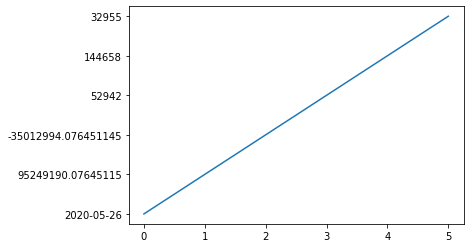

In [54]:
plt.plot(v)

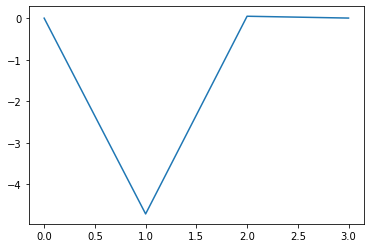

In [55]:
plt.plot(p)

### Getting The Results For Next 5 Days Forecasting

In [49]:
# How many days should we use ?? and Why ?? 
t7 = np.arange(0, 26, 1)
print(t7)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [56]:
for z in range(1, len(last9_params)+1):
    results = seird_model(last9_vals[z-1], last9_params[z-1], t7)
    t_z = np.arange(start = 10 - z, stop= 27 - z, step =1)
    print("Predictions using", last9_vals[z-1][0], "parameters\n")
    print("------------------------------------------------------------------------")
    print("Date", "\t\tInfected", "\tRecovered", "\t\tDeaths")
    print("------------------------------------------------------------------------")
    for day in t_z:
        print(results[day][0], "\t", int(float(results[day][3])), "\t\t", int(float(results[day][4])), "\t\t", int(float(results[day][5])) )
    print("------------------------------------------------------------------------\n\n")

Predictions using 2020-05-18 parameters

------------------------------------------------------------------------
Date 		Infected 	Recovered 		Deaths
------------------------------------------------------------------------
2020-05-27 	 55725 		 144551 		 33351
2020-05-28 	 54769 		 146289 		 33487
2020-05-29 	 53856 		 147996 		 33620
2020-05-30 	 52984 		 149676 		 33751
2020-05-31 	 52152 		 151327 		 33880
2020-06-01 	 51358 		 152954 		 34007
2020-06-02 	 50602 		 154555 		 34132
2020-06-03 	 49880 		 156132 		 34256
2020-06-04 	 49193 		 157688 		 34377
2020-06-05 	 48539 		 159221 		 34497
2020-06-06 	 47917 		 160735 		 34615
2020-06-07 	 47325 		 162229 		 34731
2020-06-08 	 46763 		 163704 		 34847
2020-06-09 	 46229 		 165162 		 34961
2020-06-10 	 45723 		 166604 		 35073
2020-06-11 	 45243 		 168029 		 35184
2020-06-12 	 44789 		 169440 		 35294
------------------------------------------------------------------------


Predictions using 2020-05-19 parameters

---------------